In [1]:
# Import library pandas
import pandas as pd

# Import library numpy
import numpy as np

# Import library matplotlib dan seaborn untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Menonaktifkan pesan peringatan (warning)
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Memuat data training dari file csv
df = pd.read_csv('/content/data_training.csv')

In [6]:
# Menampilkan info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         857 non-null    float64
 1   volatile acidity      857 non-null    float64
 2   citric acid           857 non-null    float64
 3   residual sugar        857 non-null    float64
 4   chlorides             857 non-null    float64
 5   free sulfur dioxide   857 non-null    float64
 6   total sulfur dioxide  857 non-null    float64
 7   density               857 non-null    float64
 8   pH                    857 non-null    float64
 9   sulphates             857 non-null    float64
 10  alcohol               857 non-null    float64
 11  quality               857 non-null    int64  
 12  Id                    857 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 87.2 KB


Berdasarkan informasi dari dataset tersebut, diketahui bahwa dataset terdiri dari 857 baris dan 13 kolom yang memuat berbagai informasi. Dataset mencakup 11 fitur numerik bertipe float64 yaitu fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulful dioxide, density, pH, sulphates, dan alcohol serta 2 kolom bertipe integer, yaitu quality dan Id. Kolom quality sebagai target klasifikasi, sedangkan Id hanya sebagai penanda unik dan tidak digunakan sebagai fitur input.




In [7]:
# Menampilkan lima baris pertama dan terakhir dari dataset
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.3,0.740,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8,5,1366
1,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,5,103
2,10.1,0.430,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.0,7,942
3,12.9,0.500,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,6,811
4,8.4,0.360,0.32,2.2,0.081,32.0,79.0,0.99640,3.30,0.72,11.0,6,918
...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,6.7,1.040,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0,4,1467
853,8.0,0.390,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0,5,1533
854,7.4,0.350,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6,1580
855,7.9,0.570,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5,6,1216


**Mengecek Missing Value**

In [8]:
# Mengecek banyaknya missing value pada masing-masing kolom
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


Berdasarkan hasil pengecekan missing value tersebut, dapat dilihat bahwa seluruh kolom dalam dataset, yaitu fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality, dan Id memiliki nilai 0 pada hasil pengecekan nilai hilang (missing value). Hal ini menunjukkan bahwa tidak terdapat missing value pada dataset. Dengan demikian, data yang digunakan sudah lengkap dan tidak memerlukan proses imputasi atau penghapusan nilai kosong. Dataset ini siap digunakan untuk tahap analisis selanjutnya.


In [9]:
# Mengecek data duplikat
df.duplicated().sum()

np.int64(0)

Dapat dilihat bahwa jumlah data duplikat = 0, yang berarti tidak ada data yang duplikat.

In [10]:
# Deskripsi Statistik
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000
mean,8.261960,0.529393,0.267351,2.506184,0.086830,15.782964,45.978413,0.996692,3.313092,0.656709,10.430338,5.653442,813.749125
std,1.701992,0.179162,0.195144,1.293512,0.048721,10.300402,31.692113,0.001901,0.152079,0.167364,1.066971,0.821777,463.807063
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.390000,8.400000,3.000000,0.000000
25%,7.100000,0.395000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995520,3.210000,0.550000,9.500000,5.000000,413.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,14.000000,38.000000,0.996680,3.310000,0.620000,10.200000,6.000000,814.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,63.000000,0.997800,3.400000,0.730000,11.100000,6.000000,1214.000000
max,15.600000,1.580000,1.000000,15.500000,0.611000,68.000000,278.000000,1.003200,4.010000,2.000000,14.000000,8.000000,1597.000000


Hasil deskripsi statistik di atas, menunjukkan bahwa dataset memiliki distribusi nilai yang wajar tanpa indikasi data yang hilang, serta menggambarkan keragaman karakteristik kimiawi anggur yang dapat digunakan untuk analisis lebih lanjut.

In [11]:
# Drop kolom 'Id'
df.drop('Id', axis=1, inplace=True)

Drop kolom Id karena kolom tersebut hanya berisi nilai unik atau penanda unik dan tidak digunakan untuk prediksi.

**Mengecek Imbalance Data**

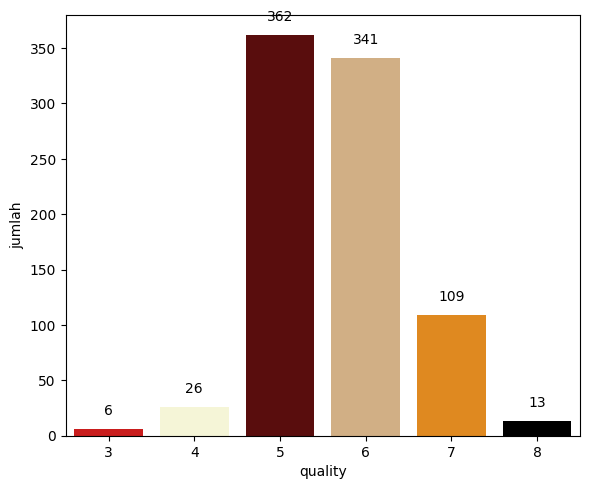

quality
5    0.422404
6    0.397900
7    0.127188
4    0.030338
8    0.015169
3    0.007001
Name: proportion, dtype: float64


In [12]:
# Mengecek imbalanced atau tidak pada dataset (kolom quality)
plt.figure(figsize=(6,5))
ax = sns.countplot(x='quality', data=df, palette=['#e60000','#FAFAD2','#660000','#DEB078','#FF8C00','black'])

# Menambahkan jumlah hasil di atas grafik batang
for p in ax.patches:
    jumlah = int(p.get_height())
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=jumlah + 10,
        s=f'{jumlah}',
        ha='center', va='bottom', fontsize=10
    )

plt.xlabel('quality')
plt.ylabel('jumlah')

plt.tight_layout()
plt.show()

persentase = df['quality'].value_counts(normalize=True)
print(persentase)

Dari hasil diagram batang dan diagram pie di atas, dapat dilihat distribusi 'quality' dalam dataset. Nilai 3 memiliki jumlah sebanyak 6 data atau sekitar 0,7%, nilai 4 memiliki jumlah 26 atau sekitar 3%, nilai 5 memiliki jumlah 362 atau sekitar 42,2%, nilai 6 memiliki jumlah 341 atau sekitar 39,8%, nilai 7 memiliki jumlah 109 atau sekitar 12,7%, nilai 8 memiliki jumlah 13 atau sekitar 1,5%. Kondisi seperti ini menandakan bahwa dataset cenderung tidak seimbang, sehingga model klasifikasi sehingga model klasifikasi berpotensi lebih fokus mempelajari pola dari kelas mayoritas dan dapat mengabaikan kelas minoritas. Hal ini menunjukkan adanya ketidakseimbangan (imbalance) dalam distribusi kelas pada kolom 'quality'.

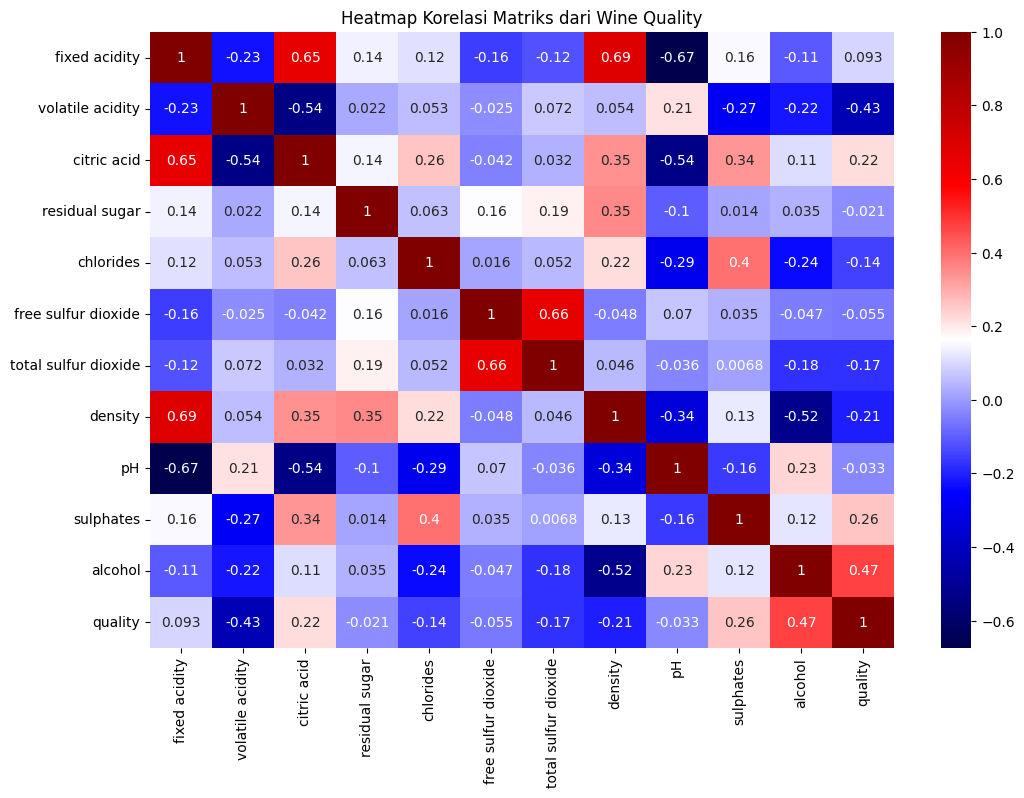

In [13]:
# Menghitung matriks korelasi
corr = df.corr()

# Plot heatmap matriks korelasi
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='seismic')
plt.title('Heatmap Korelasi Matriks dari Wine Quality')
plt.show()

Heatmap korelasi fitur tersebut menunjukkan hubungan antar variabel pada dataset. Terlihat bahwa fixed acidity memiliki korelasi positif tinggi dengan citric acid (0.65) dan density (0.69), serta korelasi negatif kuat dengan pH (-0.67), menunjukkan bahwa semakin tinggi keasaman tetap, pH cenderung menurun. Total sulfur dioxide berkorelasi positif dengan free sulfur dioxide (0.66), menandakan hubungan langsung antara keduanya. Sementara itu, alcohol memiliki korelasi positif sedang dengan quality (0.47), mengindikasikan bahwa kadar alkohol berpengaruh terhadap kualitas wine. Secara umum, tidak ada multikolinearitas ekstrem antar variabel, namun beberapa hubungan kuat perlu diperhatikan dalam pemodelan selanjutnya.

**Presentase Wine Quality**

In [14]:
import plotly.graph_objects as go

target = df[['quality']].value_counts(normalize=True).sort_index().round(decimals=3)*100

pal, color=['#e60000','#FAFAD2','#660000','#DEB078','#FF8C00','black'], ['#e60000','#FAFAD2','#660000','#DEB078','#FF8C00','black']
fig=go.Figure()

fig.add_trace(go.Pie(labels=target.index, values=target, hole=.5,
                     showlegend=True,sort=False,
                     marker=dict(colors=color,line=dict(color=pal,width=2.5)),
                     hovertemplate = "%{label} Transported: %{value:.1f}%<extra></extra>"))

temp=dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12), height=500, width=700))

fig.update_layout(template=temp, title='Donut Chart Wine Quality',
                  legend=dict(traceorder='reversed',y=1.05,x=0),
                  uniformtext_minsize=15, uniformtext_mode='hide',height=500)
fig.show()

Dari pie chart diatas dapat diketahui bahwa distribusi kualitas anggur didominasi oleh kategori dengan nilai 5 sebesar 42,2%, diikuti oleh nilai 6 sebesar 39,8%. Hal ini menunjukkan bahwa sebagian besar anggur dalam dataset memiliki kualitas sedang hingga sedikit di atas rata-rata. Sementara itu, anggur dengan kualitas tinggi, yaitu nilai 7, hanya mencakup 12,7%, dan kategori kualitas sangat tinggi (nilai 8) hanya 0,7%. Adapun kualitas rendah dengan nilai 4 dan 3 masing-masing hanya 3% dan 1,5%. Secara keseluruhan, distribusi ini menggambarkan bahwa sebagian besar anggur memiliki kualitas menengah, sedangkan anggur dengan kualitas sangat baik atau sangat buruk relatif jarang ditemukan.

**Distribusi Kadar Alkohol berdasarkan Kualitas Wine**



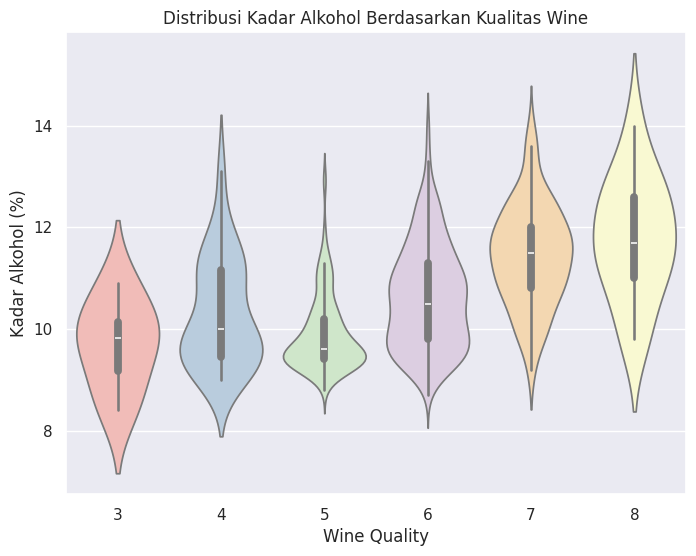

In [15]:
# Violin Plot Alcohol vs. Quality
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.violinplot(x='quality', y='alcohol', data=df, palette="Pastel1")
plt.title('Distribusi Kadar Alkohol Berdasarkan Kualitas Wine')
plt.xlabel('Wine Quality')
plt.ylabel('Kadar Alkohol (%)')
plt.show()


Berdasarkan grafik distribusi violin plot tersebut dapat disimpulkan bahwa, kadar alkohol memiliki tren yang cenderung meningkat seiring dengan meningkatnya kualitas wine, terutama terlihat jelas pada kelompok kualitas 6, 7, dan 8, di mana distribusi kadar alkoholnya secara visual berada pada rentang yang lebih tinggi dan dengan median yang lebih tinggi dibandingkan kualitas 3, 4, dan 5. Namun, perlu dicatat bahwa rentang (spread) kadar alkohol untuk kualitas yang lebih tinggi (seperti 7 dan 8) juga cenderung lebih lebar, menunjukkan adanya variasi kadar alkohol yang lebih besar dalam kategori wine berkualitas tinggi.

**Distribusi Fixed Acidity Berdasarkan Kualitas Wine**

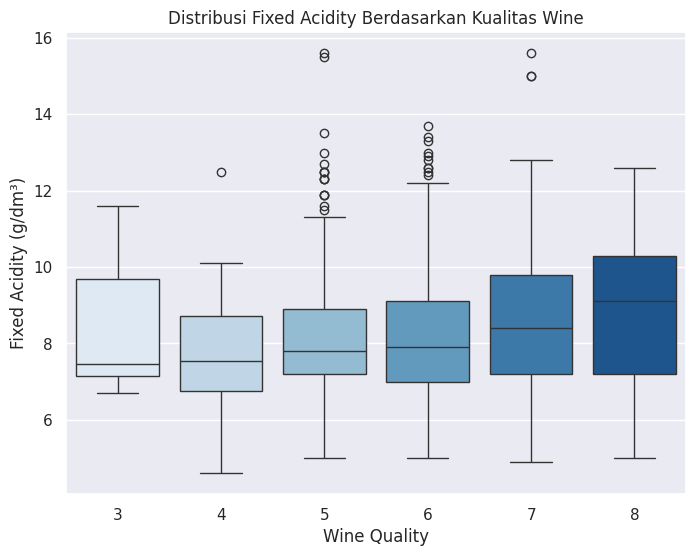

In [16]:
# Boxplot Fixed Acidity vs. Quality
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='quality', y='fixed acidity', palette='Blues')
plt.title('Distribusi Fixed Acidity Berdasarkan Kualitas Wine')
plt.xlabel('Wine Quality')
plt.ylabel('Fixed Acidity (g/dm³)')
plt.show()

Berdasarkan box plot tersebut, tidak terlihat adanya korelasi positif atau negatif yang kuat, median Fixed Acidity cenderung tetap stabil di sekitar 7.5 hingga 9.0 pada semua kelompok kualitas, menunjukkan bahwa Fixed Acidity bukanlah faktor tunggal penentu kualitas wine. Meskipun demikian, wine berkualitas tinggi (7 dan 8) menunjukkan median yang sedikit lebih tinggi dan variabilitas yang lebih besar (kotak dan whisker yang lebih lebar) dibandingkan kualitas 3 dan 4, yang juga memiliki banyak pencilan (outliers) dengan nilai fixed acidity yang sangat tinggi pada kualitas 5, 6, dan 7.

**Hubungan antara Volatile Acidity dengan Kualitas Wine**

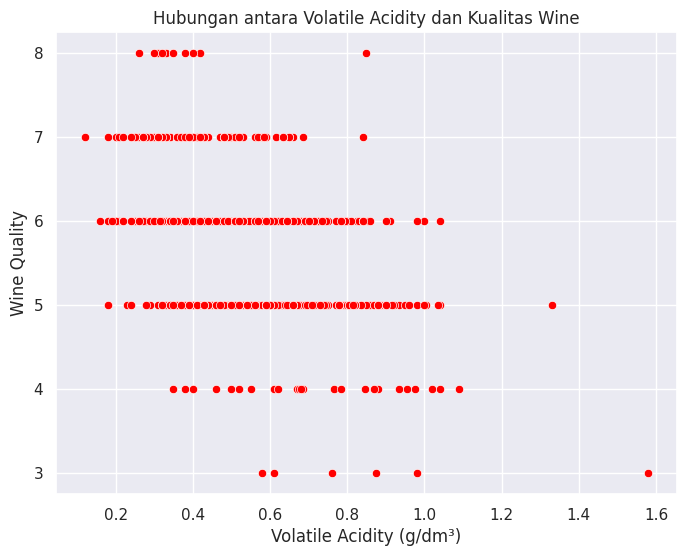

In [17]:
# Scatterplot Volatile Acidity vs. Quality
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='volatile acidity', y='quality', color='red')
plt.title('Hubungan antara Volatile Acidity dan Kualitas Wine')
plt.xlabel('Volatile Acidity (g/dm³)')
plt.ylabel('Wine Quality')
plt.show()

Berdasarkan scatterplot tersebut  terlihat jelas bahwa, kualitas wine tertinggi (7 dan 8) hanya muncul ketika Volatile Acidity berada pada tingkat rendah (sekitar 0.2 hingga 0.8), sementara wine dengan Volatile Acidity yang sangat tinggi (di atas 1.0) hampir seluruhnya diklasifikasikan sebagai kualitas rendah (khususnya kualitas 3). Distribusi titik menunjukkan bahwa Volatile Acidity merupakan faktor pembatas yang signifikan, di mana Volatile Acidity yang tinggi sangat berkorelasi dengan kualitas wine yang buruk.

**Hubungan antara Citric Acid dan Kualitas Wine**

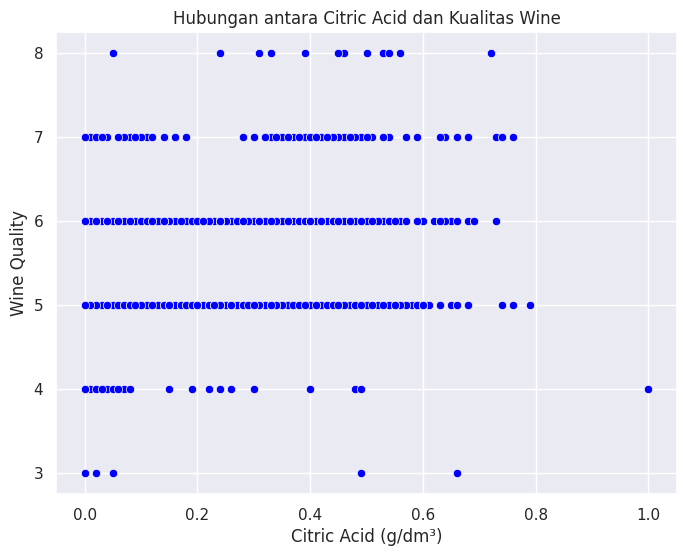

In [18]:
# Scatterplot Citric Acid vs. Quality
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='citric acid', y='quality', color='blue')
plt.title('Hubungan antara Citric Acid dan Kualitas Wine')
plt.xlabel('Citric Acid (g/dm³)')
plt.ylabel('Wine Quality')
plt.show()

Berdasarkan scatter plot tersebut, tidak terlihat adanya korelasi linear yang kuat, namun ada kecenderungan bahwa kualitas wine yang lebih tinggi (7 dan 8) cenderung memiliki kadar Citric Acid yang berada di kisaran yang lebih lebar dan lebih tinggi (mulai dari sekitar 0.1 hingga 0.8), dibandingkan dengan kualitas terendah (3), yang hanya muncul pada konsentrasi Citric Acid yang sangat rendah. Sebagian besar wine dari semua kualitas memiliki kadar Citric Acid di bawah 0.5, menunjukkan bahwa sementara Citric Acid mungkin bukan faktor penentu utama, tingkat keberadaannya yang rendah tampaknya lebih dominan di seluruh sampel data.

**Distribusi Residual Sugar Berdasarkan Kualitas Wine**

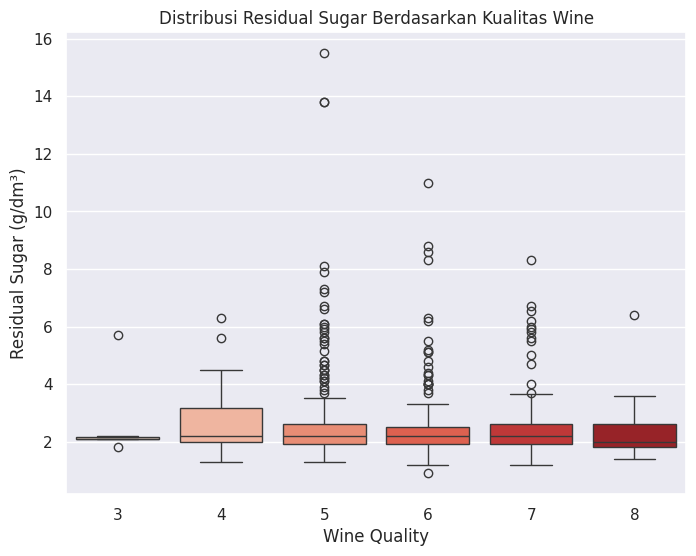

In [19]:
# Boxplot Residual Sugar vs. Quality
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='quality', y='residual sugar', palette='Reds')
plt.title('Distribusi Residual Sugar Berdasarkan Kualitas Wine')
plt.xlabel('Wine Quality')
plt.ylabel('Residual Sugar (g/dm³)')
plt.show()

Berdasarkan box plot tersebut terlihat bahwa, kadar gula sisa (residual sugar) umumnya rendah dan relatif konsisten di semua tingkat kualitas wine, dengan sebagian besar median (garis tengah kotak) berada di kisaran 2.0 hingga 2.5 g/dm³. Perbedaan paling signifikan terlihat pada wine berkualitas 4, yang memiliki median sedikit lebih tinggi dan rentang interkuartil (IQR) paling lebar. Namun, secara keseluruhan, data didominasi oleh banyaknya pencilan (outliers) pada nilai residual sugar yang sangat tinggi (mencapai sekitar 14 g/dm³), terutama pada wine kualitas 5 dan 6, menunjukkan bahwa meskipun sebagian besar wine memiliki kadar gula sisa yang rendah, varian wine manis dapat ditemukan di seluruh spektrum kualitas.

**Distribusi Sulphates Berdasarkan Kualitas Wine**

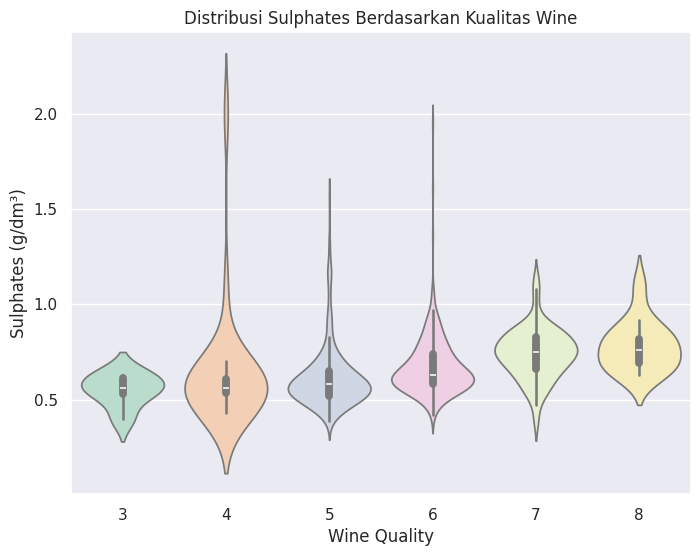

In [20]:
# Violin Plot Sulphates vs. Quality
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='quality', y='sulphates', palette='Pastel2')
plt.title('Distribusi Sulphates Berdasarkan Kualitas Wine')
plt.xlabel('Wine Quality')
plt.ylabel('Sulphates (g/dm³)')
plt.show()

Berdasarkan violin plot tersebut, terlihat jelas adanya tren kenaikan median dan konsentrasi kadar Sulphates seiring dengan meningkatnya kualitas wine, di mana wine kualitas 7 dan 8 memiliki konsentrasi Sulphates yang terpusat pada nilai yang lebih tinggi (sekitar 0.7 hingga 0.8) dibandingkan dengan wine kualitas rendah (3 dan 4) yang terpusat di kisaran 0.5. Meskipun demikian, wine kualitas 4 dan 5 menunjukkan variabilitas yang ekstrem (kurva yang sangat panjang dan tipis) dan memiliki pencilan (outliers) tertinggi pada kadar Sulphates, menunjukkan bahwa kadar Sulphates yang tinggi tidak secara eksklusif ditemukan pada wine berkualitas tinggi.

**Distribusi Chlorides Berdasarkan Kualitas Wine**

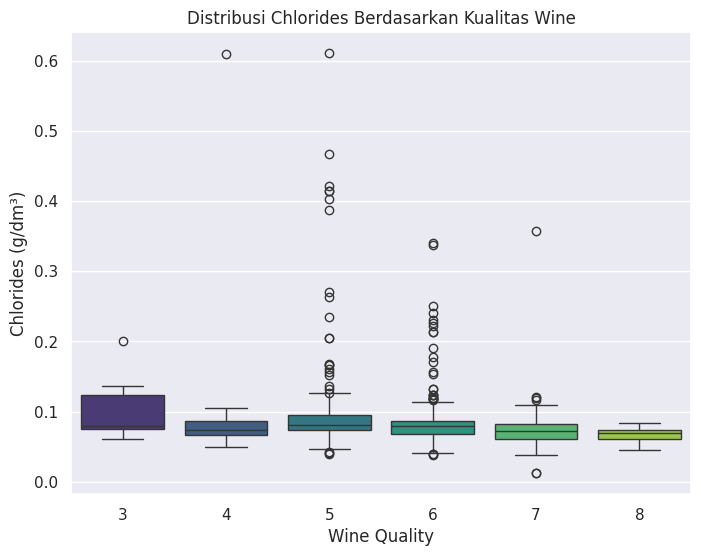

In [21]:
# Boxplot Chlorides vs. Quality
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='chlorides', data=df, palette='viridis')
plt.title('Distribusi Chlorides Berdasarkan Kualitas Wine')
plt.xlabel('Wine Quality')
plt.ylabel('Chlorides (g/dm³)')
plt.show()

Berdasarkan boxplot tersebut menunjukkan bahwa, distribusi kadar chlorides (garam) dalam wine berdasarkan tingkat kualitasnya. Terlihat bahwa kadar chlorides cenderung menurun seiring meningkatnya kualitas wine. Wine dengan kualitas rendah (seperti kualitas 3) memiliki median chlorides yang lebih tinggi dan sebaran data yang lebih lebar, menunjukkan kandungan garam yang relatif lebih banyak dan bervariasi. Sebaliknya, wine dengan kualitas tinggi (kualitas 7–8) memiliki kadar chlorides yang lebih rendah dan stabil, menandakan bahwa wine berkualitas baik umumnya memiliki kandungan garam yang lebih sedikit.

**Distribusi Free Sulfur Dioxide  Berdasarkan Kualitas Wine**

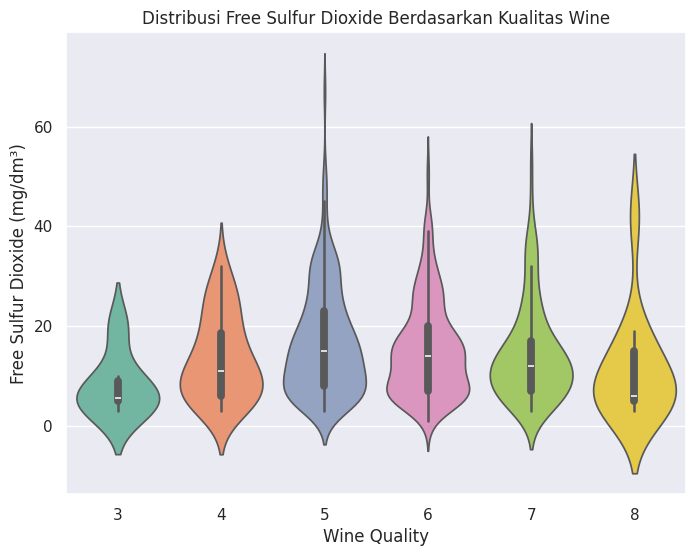

In [22]:
# Violin Plot Free Sulfur Dioxide  vs. Quality
sns.set(style="darkgrid")
plt.figure(figsize=(8,  6))
sns.violinplot(data=df, x='quality', y='free sulfur dioxide', palette='Set2')
plt.title('Distribusi Free Sulfur Dioxide Berdasarkan Kualitas Wine')
plt.xlabel('Wine Quality')
plt.ylabel('Free Sulfur Dioxide (mg/dm³)')
plt.show()

Berdasarkan violin plot tersebut menunjukkan bahwa, distribusi kadar Free Sulfur Dioxide (mg/dm³) tidak jauh berbeda secara signifikan di antara berbagai tingkat kualitas wine (3 hingga 8). Pada semua kategori kualitas, median (garis tebal di tengah) kadar Free Sulfur Dioxide berada di rentang yang relatif sempit, yaitu antara sekitar 10 hingga 20 mg/dm³. Namun, wine dengan kualitas 5 dan 6 menunjukkan variasi kadar yang paling luas (distribusi paling "lebar" dan tinggi), yang berarti kadar Free Sulfur Dioxide untuk kualitas ini dapat sangat rendah hingga sangat tinggi (mencapai lebih dari 60 mg/dm³) dibandingkan dengan wine kualitas lainnya, sementara kualitas 3 memiliki distribusi yang paling sempit.

**Distribusi Total Sulfur Dioxide Berdasarkan Kualitas Wine**

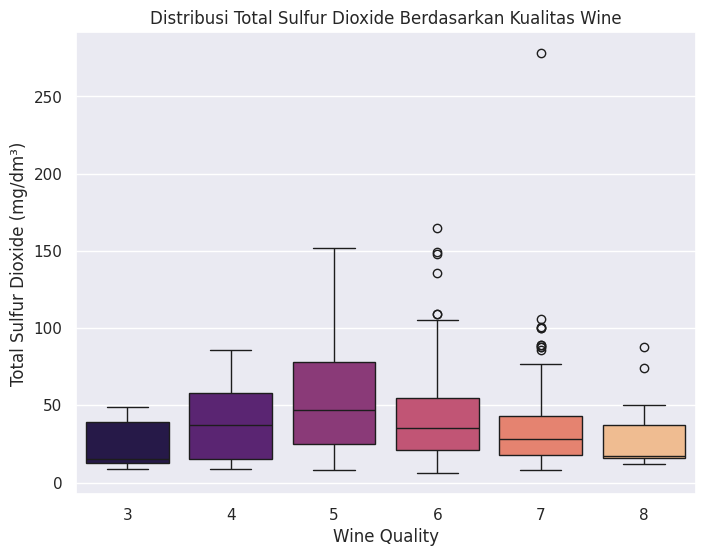

In [23]:
# Boxplot Total Sulfur Dioxide vs. Quality
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='total sulfur dioxide', data=df, palette='magma')
plt.title('Distribusi Total Sulfur Dioxide Berdasarkan Kualitas Wine')
plt.xlabel('Wine Quality')
plt.ylabel('Total Sulfur Dioxide (mg/dm³)')
plt.show()

Berdasarkan box plot tersebut menunjukkan bahwa, secara umum kadar median (Total Sulfur Dioxide) cenderung menurun seiring dengan peningkatan kualitas wine, meskipun perbedaannya tidak terlalu ekstrem. Wine dengan kualitas terendah (Kualitas 3 dan 4) memiliki median Total Sulfur Dioxide tertinggi (sekitar 35–40 mg/dm³), sedangkan wine dengan kualitas terbaik (Kualitas 7 dan 8) memiliki median terendah (sekitar 25 mg/dm³). Selain itu, variabilitas kadar Total Sulfur Dioxide terlihat paling besar pada Kualitas 5 dan 6 (ditunjukkan oleh kotak dan whisker yang lebih panjang), dan terdapat banyak data outlier (titik-titik di luar whisker) pada kelompok Kualitas 6 dan 7, menunjukkan beberapa wine berkualitas baik ini masih memiliki kadar Total Sulfur Dioxide yang sangat tinggi.

**Distribusi Density Berdasarkan Kualitas Wine**

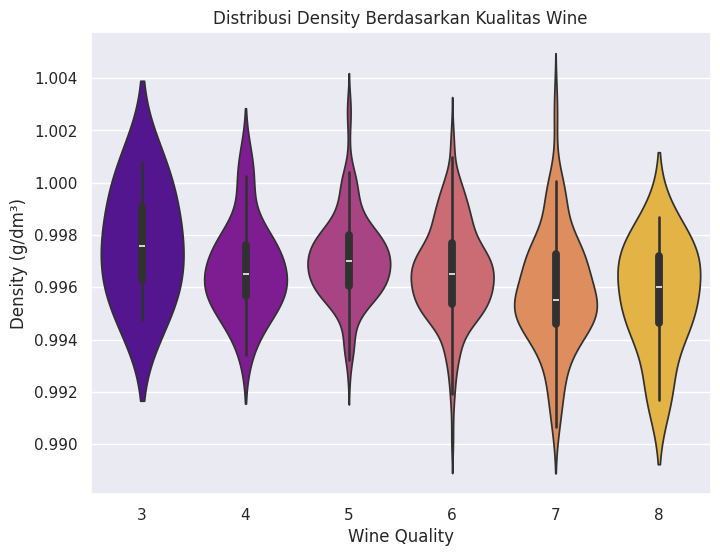

In [24]:
# Violin Plot Density vs. Quality
sns.set(style="darkgrid")
plt.figure(figsize=(8,  6))
sns.violinplot(data=df, x='quality', y='density', palette='plasma')
plt.title('Distribusi Density Berdasarkan Kualitas Wine')
plt.xlabel('Wine Quality')
plt.ylabel('Density (g/dm³)')
plt.show()

Berdasarkan violin plot tersebut menunjukkan bahwa secara umum, density wine cenderung sedikit menurun seiring dengan peningkatan kualitas wine, meskipun perbedaannya sangat tipis, dengan nilai median (garis tebal di tengah) berada di kisaran 0.996 hingga 0.998 g/dm³ untuk semua kualitas. Wine Kualitas 3 menunjukkan density median tertinggi dan variasi yang relatif sempit, di mana sebagian besar data terkonsentrasi di nilai yang lebih tinggi. Sebaliknya, wine Kualitas 8 menunjukkan density median terendah dan memiliki variasi (range) yang cukup luas. Bentuk distribusi (badan violin) untuk semua kualitas terlihat cukup simetris dan unimodal (satu puncak), yang mengindikasikan bahwa sebagian besar sampel density terkumpul di sekitar nilai median masing-masing.

**Distribusi pH Berdasarkan Kualitas Wine**

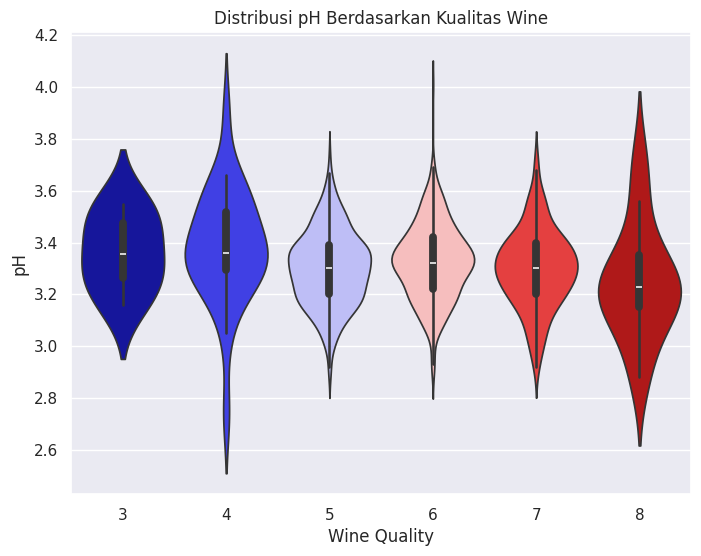

In [25]:
# Violin Plot pH vs. Quality
sns.set(style="darkgrid")
plt.figure(figsize=(8,  6))
sns.violinplot(data=df, x='quality', y='pH', palette='seismic')
plt.title('Distribusi pH Berdasarkan Kualitas Wine')
plt.xlabel('Wine Quality')
plt.ylabel('pH')
plt.show()

# **Modelling dan Evaluasi**

In [26]:
# Panggil Library dari tiap Packages

# Model Select
from sklearn.model_selection import train_test_split

# Import library Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Import library Random Forest
from sklearn.ensemble import RandomForestClassifier

# Import library SVM
from sklearn.svm import SVC

# Import library Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import library Gaussian Naive Bayes
from sklearn import naive_bayes

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**Splitting Data**

Dalam proses splitting data, dataset dibagi menjadi 2 bagian yaitu data training (pelatihan) dan data testing (pengujian). Proporsi pembagiannya yaitu 80:20, dengan 80% untuk data training dan 20% untuk data testing.

In [27]:
X = df.drop('quality', axis=1)
y = df['quality']

In [28]:
# Split Train dan Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:
# Deskripsi singkat data training
print("Info Data Training:")
print(X_train.info())

# Deskripsi singkat data testing
print("Info Data Testing:")
print(X_test.info())

Info Data Training:
<class 'pandas.core.frame.DataFrame'>
Index: 685 entries, 196 to 684
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         685 non-null    float64
 1   volatile acidity      685 non-null    float64
 2   citric acid           685 non-null    float64
 3   residual sugar        685 non-null    float64
 4   chlorides             685 non-null    float64
 5   free sulfur dioxide   685 non-null    float64
 6   total sulfur dioxide  685 non-null    float64
 7   density               685 non-null    float64
 8   pH                    685 non-null    float64
 9   sulphates             685 non-null    float64
 10  alcohol               685 non-null    float64
dtypes: float64(11)
memory usage: 64.2 KB
None
Info Data Testing:
<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 144 to 822
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtyp

Dari deskripsi data training dan testing di atas, dapat dilihat bahwa:
- Data training terdiri dari 685 entri, sedangkan data testing terdiri dari 172 entri.
- Kedua dataset memiliki 11 kolom bertipe float64.
- Tidak ada nilai yang hilang (null) pada kedua dataset

**Feature Scaling**

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Feature scaling dengan StandardScaler bertujuan untuk mentransformasi nilai setiap fitur numerik sehingga memiliki rata-rata (mean) = 0 dan standar deviasi (standard deviation) = 1.
Dengan demikian, setiap variabel berada pada skala yang serupa secara statistik, sehingga tidak ada fitur yang mendominasi model karena perbedaan skala.


# **Modelling**

**Decision Tree**

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
y_pred = dt.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_dt=round(accuracy_score(y_test,y_pred)* 100, 2)
accuracy = accuracy_score(y_test,y_pred)
print('accuracy_Decision Tree : %.2f' % accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy_Decision Tree : 0.60
[[ 0  0  0  0  0  0]
 [ 1  0  4  0  1  0]
 [ 0  3 55 14  1  1]
 [ 0  3 15 36 13  3]
 [ 0  0  0  7 12  0]
 [ 0  2  1  0  0  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.73      0.74      0.74        74
           6       0.63      0.51      0.57        70
           7       0.44      0.63      0.52        19
           8       0.00      0.00      0.00         3

    accuracy                           0.60       172
   macro avg       0.30      0.31      0.30       172
weighted avg       0.62      0.60      0.61       172



In [34]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
144,5,5
774,5,5
263,6,6
788,5,5
846,5,6
...,...,...
156,6,6
597,6,6
624,5,5
50,8,4


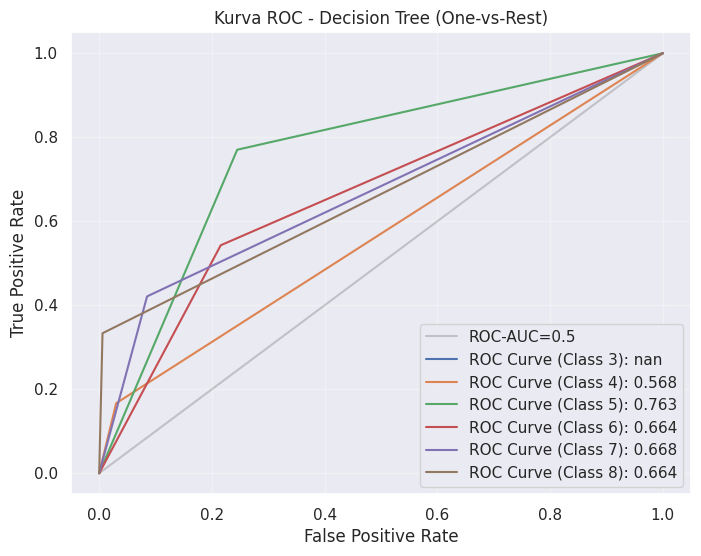

Average ROC AUC (One-vs-Rest) Decision Tree: nan


In [35]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Model Decision Tree
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

# Predict probabilities
y_pred_dt_proba = dt.predict_proba(X_test)

# Menghitung ROC dan AUC untuk setiap kelas (one-vs-rest)
fprs = {}
tprs = {}
roc_auc_dt = {}

for i, class_label in enumerate(dt.classes_):
    # Binarize the output
    y_test_bin = (y_test == class_label).astype(int)
    fprs[class_label], tprs[class_label], thresholds = roc_curve(y_test_bin, y_pred_dt_proba[:, i])
    roc_auc_dt[class_label] = roc_auc_score(y_test_bin, y_pred_dt_proba[:, i])

# Plot ROC Curve untuk setiap kelas
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle="-", c="k", alpha=0.2, label="ROC-AUC=0.5")

for class_label in dt.classes_:
    plt.plot(fprs[class_label], tprs[class_label], label=f"ROC Curve (Class {class_label}): {roc_auc_dt[class_label]:.3f}")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Kurva ROC - Decision Tree (One-vs-Rest)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Menghitung rata-rata AUC
average_roc_auc_dt = sum(roc_auc_dt.values()) / len(roc_auc_dt)
print(f"Average ROC AUC (One-vs-Rest) Decision Tree: {average_roc_auc_dt:.3f}")

**Naive Bayes**

In [36]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [37]:
y_pred = nb.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_nb=round(accuracy_score(y_test,y_pred)* 100, 2)
accuracy = accuracy_score(y_test,y_pred)
print('accuracy_Decision Tree : %.2f' % accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy_Decision Tree : 0.58
[[ 0  0  0  0  0  0]
 [ 0  2  2  2  0  0]
 [ 2  3 48 16  4  1]
 [ 0  3 16 39 12  0]
 [ 0  0  0  9 10  0]
 [ 0  0  0  1  2  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.25      0.33      0.29         6
           5       0.73      0.65      0.69        74
           6       0.58      0.56      0.57        70
           7       0.36      0.53      0.43        19
           8       0.00      0.00      0.00         3

    accuracy                           0.58       172
   macro avg       0.32      0.34      0.33       172
weighted avg       0.60      0.58      0.58       172



In [39]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
144,5,5
774,5,5
263,6,6
788,5,5
846,5,5
...,...,...
156,6,5
597,6,6
624,5,6
50,8,7


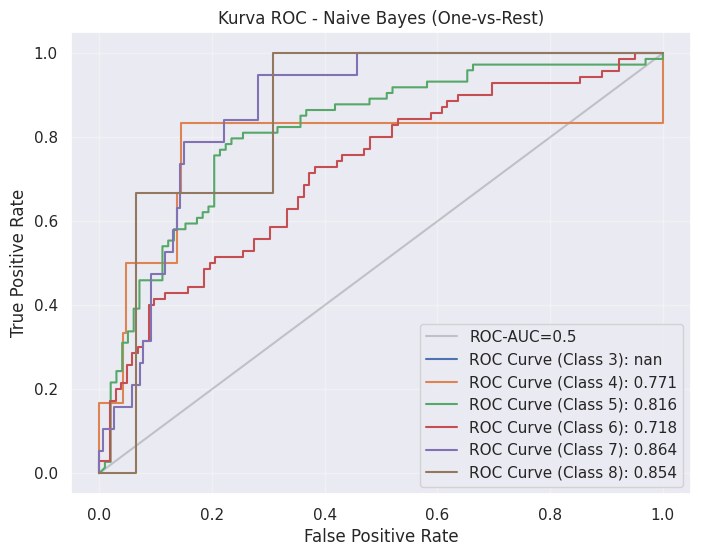

Average ROC AUC (One-vs-Rest) Naive Bayes: nan


In [40]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Model Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict probabilities
y_pred_nb_proba = nb.predict_proba(X_test)

# Menghitung ROC dan AUC untuk setiap kelas (one-vs-rest)
fprs = {}
tprs = {}
roc_auc_nb = {}

for i, class_label in enumerate(nb.classes_):
    # Binarize the output
    y_test_bin = (y_test == class_label).astype(int)
    fprs[class_label], tprs[class_label], thresholds = roc_curve(y_test_bin, y_pred_nb_proba[:, i])
    roc_auc_nb[class_label] = roc_auc_score(y_test_bin, y_pred_nb_proba[:, i])

# Plot ROC Curve untuk setiap kelas
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle="-", c="k", alpha=0.2, label="ROC-AUC=0.5")

for class_label in nb.classes_:
    plt.plot(fprs[class_label], tprs[class_label], label=f"ROC Curve (Class {class_label}): {roc_auc_nb[class_label]:.3f}")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Kurva ROC - Naive Bayes (One-vs-Rest)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Menghitung rata-rata AUC
average_roc_auc_nb = sum(roc_auc_nb.values()) / len(roc_auc_nb)
print(f"Average ROC AUC (One-vs-Rest) Naive Bayes: {average_roc_auc_nb:.3f}")

**Random Forest**

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
y_pred = rf.predict(X_test)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_rf=round(accuracy_score(y_test,y_pred)* 100, 2)
accuracy = accuracy_score(y_test,y_pred)
print('accuracy_Decision Tree : %.2f' % accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy_Decision Tree : 0.72
[[ 0  6  0  0  0]
 [ 0 62 12  0  0]
 [ 0 12 52  6  0]
 [ 0  0 10  9  0]
 [ 0  0  3  0  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.78      0.84      0.81        74
           6       0.68      0.74      0.71        70
           7       0.60      0.47      0.53        19
           8       0.00      0.00      0.00         3

    accuracy                           0.72       172
   macro avg       0.41      0.41      0.41       172
weighted avg       0.67      0.72      0.69       172



In [44]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
144,5,5
774,5,5
263,6,6
788,5,5
846,5,5
...,...,...
156,6,6
597,6,6
624,5,6
50,8,6


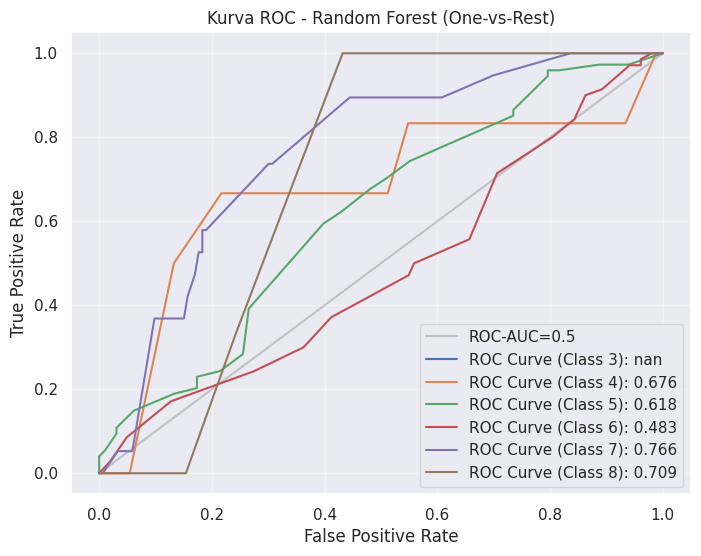

Average ROC AUC (One-vs-Rest) Random Forest: nan


In [45]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Model Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Predict probabilities
y_pred_rf_proba = rf.predict_proba(X_test_scaled)

# Menghitung ROC dan AUC untuk setiap kelas (one-vs-rest)
fprs = {}
tprs = {}
roc_auc_rf = {}

for i, class_label in enumerate(rf.classes_):
    # Binarize the output
    y_test_bin = (y_test == class_label).astype(int)
    fprs[class_label], tprs[class_label], thresholds = roc_curve(y_test_bin, y_pred_rf_proba[:, i])
    roc_auc_rf[class_label] = roc_auc_score(y_test_bin, y_pred_rf_proba[:, i])

# Plot ROC Curve untuk setiap kelas
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle="-", c="k", alpha=0.2, label="ROC-AUC=0.5")

for class_label in rf.classes_:
    plt.plot(fprs[class_label], tprs[class_label], label=f"ROC Curve (Class {class_label}): {roc_auc_rf[class_label]:.3f}")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Kurva ROC - Random Forest (One-vs-Rest)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Menghitung rata-rata AUC
average_roc_auc_rf = sum(roc_auc_rf.values()) / len(roc_auc_rf)
print(f"Average ROC AUC (One-vs-Rest) Random Forest: {average_roc_auc_rf:.3f}")

**Logistic Regression**

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver= 'lbfgs',max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [47]:
y_pred = lr.predict(X_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_lr=round(accuracy_score(y_test,y_pred)* 100, 2)
accuracy = accuracy_score(y_test,y_pred)
print('accuracy_Decision Tree : %.2f' % accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy_Decision Tree : 0.63
[[ 0  0  0  0  0  0]
 [ 0  0  4  1  1  0]
 [ 1  0 62 11  0  0]
 [ 0  0 20 45  5  0]
 [ 0  0  0 17  2  0]
 [ 0  0  0  3  0  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.72      0.84      0.78        74
           6       0.58      0.64      0.61        70
           7       0.25      0.11      0.15        19
           8       0.00      0.00      0.00         3

    accuracy                           0.63       172
   macro avg       0.26      0.26      0.26       172
weighted avg       0.58      0.63      0.60       172



In [49]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
144,5,5
774,5,5
263,6,6
788,5,5
846,5,5
...,...,...
156,6,5
597,6,6
624,5,5
50,8,6


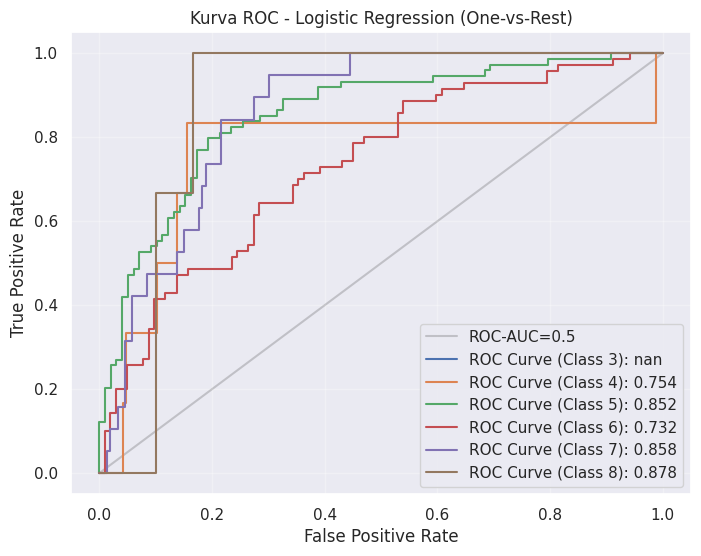

Average ROC AUC (One-vs-Rest) Logistic Regression: nan


In [50]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Model Logistic Regression
lr = LogisticRegression(solver= 'lbfgs',max_iter=1000)
lr.fit(X_train, y_train)

# Predict probabilities
y_pred_lr_proba = lr.predict_proba(X_test)

# Menghitung ROC dan AUC untuk setiap kelas (one-vs-rest)
fprs = {}
tprs = {}
roc_auc_lr = {}

for i, class_label in enumerate(lr.classes_):
    # Binarize the output
    y_test_bin = (y_test == class_label).astype(int)
    fprs[class_label], tprs[class_label], thresholds = roc_curve(y_test_bin, y_pred_lr_proba[:, i])
    roc_auc_lr[class_label] = roc_auc_score(y_test_bin, y_pred_lr_proba[:, i])

# Plot ROC Curve untuk setiap kelas
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle="-", c="k", alpha=0.2, label="ROC-AUC=0.5")

for class_label in lr.classes_:
    plt.plot(fprs[class_label], tprs[class_label], label=f"ROC Curve (Class {class_label}): {roc_auc_lr[class_label]:.3f}")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Kurva ROC - Logistic Regression (One-vs-Rest)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Menghitung rata-rata AUC
average_roc_auc_lr = sum(roc_auc_lr.values()) / len(roc_auc_lr)
print(f"Average ROC AUC (One-vs-Rest) Logistic Regression: {average_roc_auc_lr:.3f}")

**SVM**

In [51]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
svm = SVC(kernel='linear', probability=True, random_state=0)
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

In [52]:
y_pred = svm.predict(X_test)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_svm=round(accuracy_score(y_test,y_pred)* 100, 2)
accuracy = accuracy_score(y_test,y_pred)
print('accuracy_Decision Tree : %.2f' % accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy_Decision Tree : 0.62
[[ 0  4  2  0  0]
 [ 0 60 14  0  0]
 [ 0 23 47  0  0]
 [ 0  0 19  0  0]
 [ 0  0  3  0  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.69      0.81      0.75        74
           6       0.55      0.67      0.61        70
           7       0.00      0.00      0.00        19
           8       0.00      0.00      0.00         3

    accuracy                           0.62       172
   macro avg       0.25      0.30      0.27       172
weighted avg       0.52      0.62      0.57       172



In [54]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
144,5,5
774,5,5
263,6,6
788,5,5
846,5,6
...,...,...
156,6,5
597,6,6
624,5,5
50,8,6


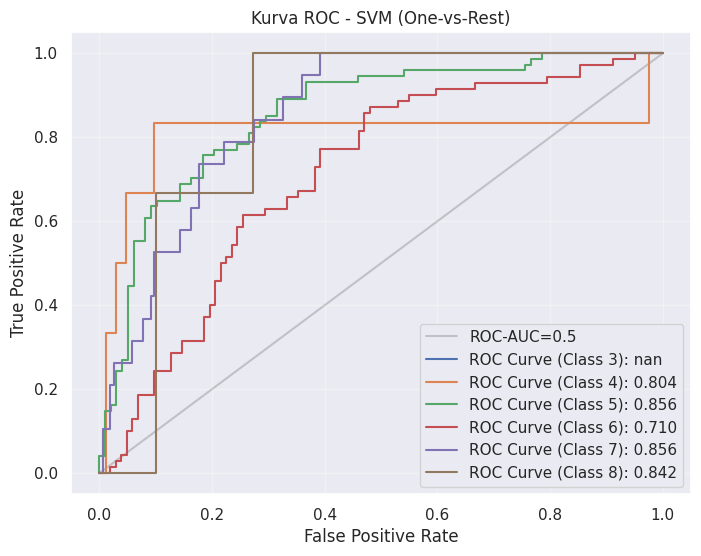

Average ROC AUC (One-vs-Rest) SVM: nan


In [55]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Model SVM
svm = SVC (kernel='linear', probability=True, random_state=0)
svm.fit(X_train, y_train)

# Predict probabilities
y_pred_svm_proba = svm.predict_proba(X_test)

# Menghitung ROC dan AUC untuk setiap kelas (one-vs-rest)
fprs = {}
tprs = {}
roc_auc_svm = {} # Corrected variable name

for i, class_label in enumerate(svm.classes_):
    # Binarize the output
    y_test_bin = (y_test == class_label).astype(int)
    fprs[class_label], tprs[class_label], thresholds = roc_curve(y_test_bin, y_pred_svm_proba[:, i])
    roc_auc_svm[class_label] = roc_auc_score(y_test_bin, y_pred_svm_proba[:, i])

# Plot ROC Curve untuk setiap kelas
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle="-", c="k", alpha=0.2, label="ROC-AUC=0.5")

for class_label in svm.classes_:
    plt.plot(fprs[class_label], tprs[class_label], label=f"ROC Curve (Class {class_label}): {roc_auc_svm[class_label]:.3f}")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Kurva ROC - SVM (One-vs-Rest)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Menghitung rata-rata AUC
average_roc_auc_svm = sum(roc_auc_svm.values()) / len(roc_auc_svm)
print(f"Average ROC AUC (One-vs-Rest) SVM: {average_roc_auc_svm:.3f}")

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Membuat DataFrame akurasi
results = pd.DataFrame({
    'Model': ['Random Forest',
              'Decision Tree',
              'SVM',
              'Logistic Regression',
              'Naive Bayes'],
    "Accuracy_score": [accuracy_rf,
                       accuracy_dt,
                       accuracy_svm,
                       accuracy_lr,
                       accuracy_nb]
})

# Membulatkan nilai akurasi ke bilangan bulat
results['Accuracy_score'] = results['Accuracy_score'].round(0).astype(int)

# Mengurutkan dari akurasi tertinggi ke terendah
result_df = results.sort_values(by='Accuracy_score', ascending=False).reset_index(drop=True)

# Tampilkan tabel hasil
display(result_df)

,Model,Accuracy_score
0,Random Forest,72
1,Logistic Regression,63
2,SVM,62
3,Decision Tree,60
4,Naive Bayes,58


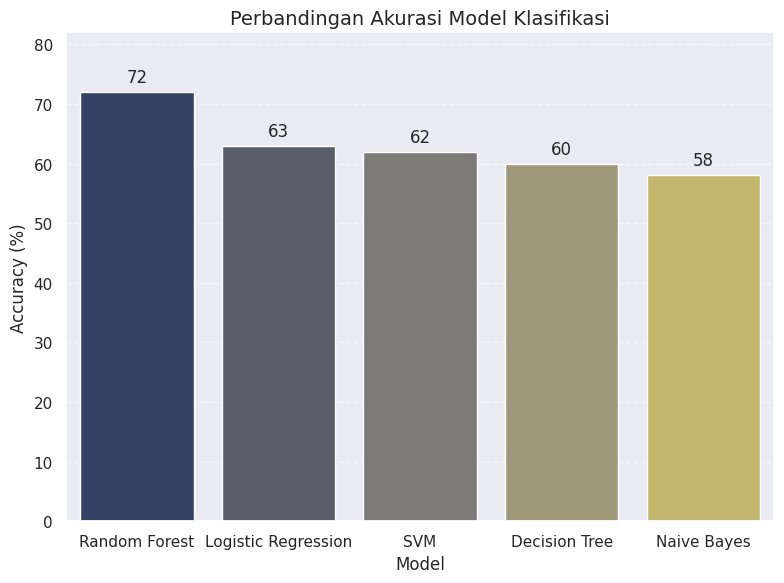

In [57]:
# Perbandingan Akurasi Model Klasifikasi

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x='Model',
    y='Accuracy_score',
    data=result_df,
    palette=sns.color_palette("cividis", n_colors=len(result_df))
)

# Menambahkan nilai di atas batang
for p in ax.patches:
    acc = int(p.get_height())
    ax.text(p.get_x() + p.get_width()/2, acc + 1, f'{acc}',
            ha='center', va='bottom', fontsize=12)

plt.title('Perbandingan Akurasi Model Klasifikasi', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(0, result_df['Accuracy_score'].max() + 10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Berdasarkan diagram batang tersebut menunjukkan bahwa perbandingan akurasi dari lima model machine learning dengan model Random Forest mendapatkan performa terbaik dengan tingkat akurasi tertinggi sebesar 72%, diikuti oleh Logistic Regression sebesar 63%, SVM sebesar 62%, Decision Tree sebesar 60% dan Naive Bayes mendapatkan akurasi paling rendah, yaitu sebesar 58%. Berdasarkan hasil ini, dapat disimpulkan bahwa Random Forest adalah model klasifikasi yang paling optimal/terbaik dari segi akurasi.

**Feature Importance**

Fitur penting (feature importance) adalah metode untuk menilai kontribusi masing-masing fitur dalam membuat prediksi oleh model machine learning. Ini membantu kita memahami mana fitur yang paling berpengaruh dalam memprediksi target dan mana yang kurang penting.

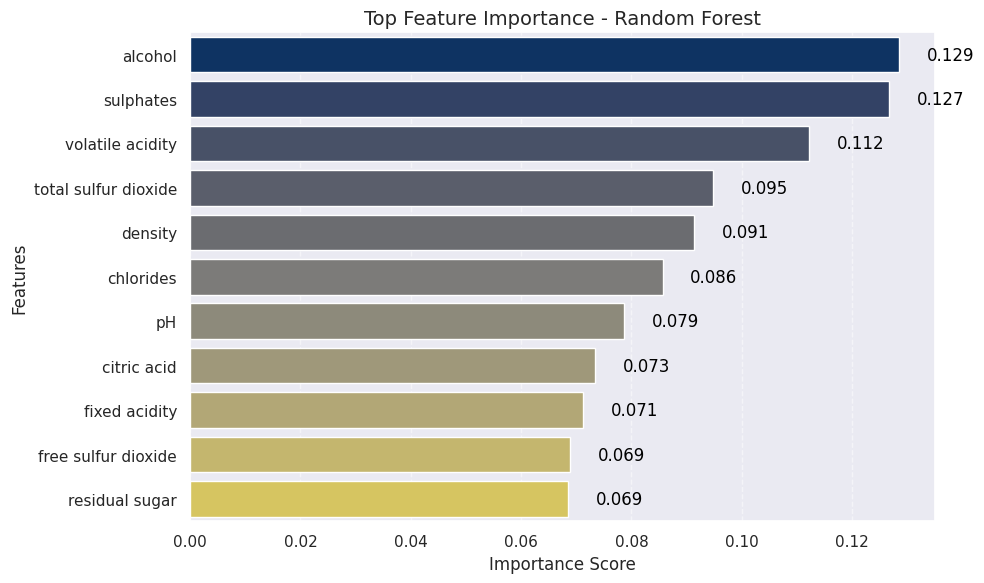

In [58]:
# Feature Importance Random Forest
feat_importance = pd.Series(rf.feature_importances_, index=X.columns)

# Urutkan dari fitur paling penting ke paling tidak penting
feat_importance = feat_importance.sort_values(ascending=False)

# Plot horizontal bar dengan warna khusus
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance, y=feat_importance.index, palette="cividis")  # bisa diganti ke 'viridis', 'crest', dll

# Tambahkan judul dan label
plt.title("Top Feature Importance - Random Forest", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Features")

# Menambahkan nilai importance di ujung batang
for i, v in enumerate(feat_importance):
    plt.text(v + 0.005, i, f"{v:.3f}", color='black', va='center')

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Diagram tersebut menunjukkan tingkat kepentingan fitur (feature importance). Variabel yang paling berpengaruh (penting) dalam model Random Forest untuk memprediksi kualitas wine dengan tiga fitur teratas yang mendominasi dan memiliki bobot kepentingan tertinggi adalah alcohol (0,129), sulphates (0,127), dan volatile acidity (0.112). Hal ini menunjukkan bahwa kandungan alkohol, kadar sulfat, dan keasaman volatil merupakan faktor utama yang paling berkontribusi dalam menentukan kualitas, sedangkan fitur seperti free sulfur dioxide dan residual sugar memiliki pengaruh yang lebih rendah terhadap hasil prediksi model.

In [ ]:
# Simpan Model Terbaik

import joblib  # Untuk menyimpan model

accuracy_scores = {
    'Random Forest': accuracy_rf,
    'Decision Tree': accuracy_dt,
    'Logistic Regression': accuracy_lr,
    'SVM': accuracy_svm,
    'Naive Bayes': accuracy_nb
}

# Menentukan model terbaik berdasarkan akurasi tertinggi
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
print(f"Model terbaik berdasarkan akurasi adalah: {best_model_name}")

# Simpan model terbaik sesuai nama
if best_model_name == 'Random Forest':
    best_model = best_rf
elif best_model_name == 'Decision Tree':
    best_model = best_dt
elif best_model_name == 'Logistic Regression':
    best_model = best_lr
elif best_model_name == 'SVM':
    best_model = best_svm
else:
    best_model = best_nb

# Simpan model terbaik dan scaler ke file .pkl
joblib.dump(best_model, f'best_model_{best_model_name.replace(" ", "_")}.pkl')
joblib.dump(scaler, 'scaler.pkl')
print(f"✅ Model terbaik ({best_model_name}) telah disimpan sebagai 'best_model_{best_model_name.replace(' ', '_')}.pkl'")
print("✅ Scaler telah disimpan sebagai 'scaler.pkl'")

Model terbaik berdasarkan akurasi adalah: Random Forest
✅ Model terbaik (Random Forest) telah disimpan sebagai 'best_model_Random_Forest.pkl'
✅ Scaler telah disimpan sebagai 'scaler.pkl'


Model terbaik (Random Forest) berhasil disimpan ke file .pkl "best_model_Random_Forest.pkl"

In [ ]:
# Memuat Model dan Melakukan Prediksi

import pandas as pd
import joblib

# Memuat data testing
test_df = pd.read_csv('/content/data_testing.csv')

In [ ]:
# Drop kolom 'Id' dari data test
test_ids = test_df['Id'] # Simpan kolom Id agar bisa digabung kembali setelah prediksi
test_df = test_df.drop('Id', axis=1)

In [ ]:
# Memuat model dan scaler yang sudah disimpan
loaded_best_model = joblib.load('/content/best_model_Random_Forest.pkl')
scaler = joblib.load('scaler.pkl')

In [ ]:
# Lakukan scaling pada data testing
X_test_scaled = scaler.transform(test_df)

In [ ]:
# Prediksi Quality
y_pred = best_model.predict(X_test_scaled)

In [ ]:
# Simpan hasil prediksi ke file csv
output = pd.DataFrame({
    'id': test_ids,
    'quality (hasil prediksi)': y_pred
})

output.to_csv('/content/hasilprediksi_021.csv', index=False)
print("✅ File hasil prediksi berhasil disimpan sebagai 'hasilprediksi_021.csv'")

✅ File hasil prediksi berhasil disimpan sebagai 'hasilprediksi_021.csv'


Hasil prediksi dari data_testing menggunakan model terbaik (Random Forest) telah tersimpan pada file cvs "hasilprediksi_021.csv"